# PyTorch Computer Vision

## 0. Computer Vision Libraries in PyTorch

1. `torchvision`: Contains datasets, model architectures and image transformations often used for computer vision problems.
2. `torchvision.datasets`: Here we find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. 
3. `torchvision.models`: This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.
4. `torchvision.transforms`: Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.
5. `torch.utils.data.Dataset`: Base dataset class for PyTorch.
6. `torch.utils.data.DataLoader`: Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

In [12]:
import torch
import random
import mlxtend
import requests
import torchvision
import pandas as pd
from torch import nn
from pathlib import Path
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from torchvision import datasets
from torchmetrics import ConfusionMatrix
from timeit import default_timer as timer
from torchvision.transforms import ToTensor
from mlxtend.plotting import plot_confusion_matrix

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.3.1
torchvision version: 0.18.1


## 1. Setting up Training Data

To download data we provide the following parameters:
- `root: str` - which folder do we want to download the data to?
- `train: Bool` - do we want the training or test split?
- `download: Bool` - should the data be downloaded?
- `transform: torchvision.transforms` - what transformations would we like to do on the data?
- `target_transform` - we can transform the targets (labels) if like to.

In [13]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",  # where to download data to?
    train=True,  # get training data
    download=True,  # download data if it doesn't exist on disk
    transform=ToTensor(),  # images come as PIL format we want to turn into Torch tensors
    target_transform=None  #we can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,  # get test data
    download=True,
    transform=ToTensor()
)

In [14]:
#seeing first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [15]:
image.shape, label  # shape is [1, 28, 28] -> channels, height, width

(torch.Size([1, 28, 28]), 9)

In [16]:
#number of samples
len(train_data.data),len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [17]:
#classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

- ### Visualising our Data

Image shape: torch.Size([1, 28, 28]) Label: 9 (Ankle boot)


Text(0.5, 1.0, 'Ankle boot')

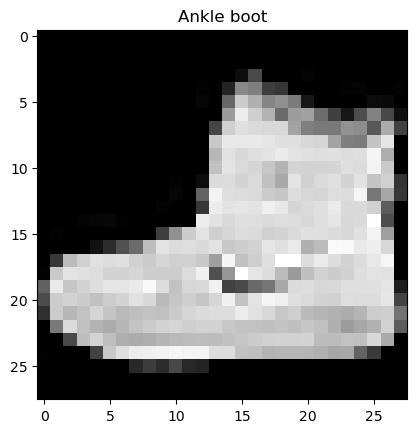

In [20]:
image, label = train_data[0]
print(f"Image shape: {image.shape} Label: {label} ({class_names[label]})")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])